In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
file_path = "AQI_dataset.csv"
data = pd.read_csv(file_path, low_memory = False)
sorted_data = data.sort_values(by = ['sitename', 'datacreationdate'])

In [3]:
sorted_data.head()

,sitename,county,aqi,pollutant,status,so2,co,o3,o3_8hr,pm10,...,winddirec,datacreationdate,unit,co_8hr,pm2.5_avg,pm10_avg,so2_avg,longitude,latitude,siteid
74,三義,苗栗縣,98.0,細懸浮微粒,普通,2.6,0.28,39,38.0,54.0,...,26.0,2018-01-01 00:00,NaN,0.4,35.0,67.0,3.0,NaN,NaN,NaN
132,三義,苗栗縣,91.0,細懸浮微粒,普通,2.3,0.26,40,39.0,53.0,...,24.0,2018-01-01 01:00,NaN,0.4,32.0,64.0,3.0,NaN,NaN,NaN
180,三義,苗栗縣,85.0,細懸浮微粒,普通,0.8,0.28,40,39.0,47.0,...,23.0,2018-01-01 02:00,NaN,0.4,29.0,60.0,3.0,NaN,NaN,NaN
283,三義,苗栗縣,78.0,細懸浮微粒,普通,0.9,0.27,40,40.0,46.0,...,23.0,2018-01-01 03:00,NaN,0.3,26.0,56.0,3.0,NaN,NaN,NaN
379,三義,苗栗縣,74.0,細懸浮微粒,普通,0.7,0.26,40,40.0,46.0,...,21.0,2018-01-01 04:00,NaN,0.3,25.0,52.0,3.0,NaN,NaN,NaN


### 處理經緯度 csv 檔案資料

In [4]:
# move longitude and latitude data to specific csv file
column_to_extract = sorted_data[['sitename', 'longitude', 'latitude']]
unique_site = column_to_extract.drop_duplicates()
unique_site = unique_site.dropna(subset = ["longitude", "latitude"])
unique_site.to_csv('各測站經緯度.csv', index = False)

### Data type conversion

In [5]:
sorted_data_drop = sorted_data.drop(columns = ['longitude', 'latitude', 'siteid', 'unit', 'sitename', 'county', 'datacreationdate', 'pollutant', 'status'])

In [6]:
columns_to_convert = sorted_data_drop.columns.difference(["aqi"])
sorted_data_drop[columns_to_convert] = sorted_data_drop[columns_to_convert].apply(pd.to_numeric, errors="coerce")

In [7]:
nan_ratio = sorted_data.isna().mean()
nan_ratio

sitename            0.000000
county              0.000000
aqi                 0.006164
pollutant           0.569132
status              0.002316
so2                 0.023676
co                  0.017372
o3                  0.021299
o3_8hr              0.018455
pm10                0.023748
pm2.5               0.021335
no2                 0.027905
nox                 0.027949
no                  0.028012
windspeed           0.032775
winddirec           0.032828
datacreationdate    0.000000
unit                1.000000
co_8hr              0.010923
pm2.5_avg           0.012544
pm10_avg            0.014518
so2_avg             0.012712
longitude           0.038467
latitude            0.038467
siteid              0.198117
dtype: float64

In [8]:
preprocess_data = sorted_data_drop.dropna()

In [9]:
# delete unreasonable data
preprocess_data_cleaned = preprocess_data[(preprocess_data >= 0).all(axis=1)]

In [10]:
for column in preprocess_data_cleaned.columns:
    min_value = preprocess_data_cleaned[column].min()
    max_value = preprocess_data_cleaned[column].max()
    print(f"欄位 {column} 的值範圍: {min_value} ~ {max_value}")

欄位 aqi 的值範圍: 4.0 ~ 500.0
欄位 so2 的值範圍: 0.0 ~ 157.5
欄位 co 的值範圍: 0.0 ~ 38.58
欄位 o3 的值範圍: 0.0 ~ 410.0
欄位 o3_8hr 的值範圍: 0.0 ~ 120.3
欄位 pm10 的值範圍: 0.0 ~ 1407.0
欄位 pm2.5 的值範圍: 0.0 ~ 1000.0
欄位 no2 的值範圍: 0.0 ~ 351.05
欄位 nox 的值範圍: 0.0 ~ 395.82
欄位 no 的值範圍: 0.0 ~ 391.31
欄位 windspeed 的值範圍: 0.0 ~ 41.0
欄位 winddirec 的值範圍: 0.0 ~ 990.0
欄位 co_8hr 的值範圍: 0.0 ~ 19.4
欄位 pm2.5_avg 的值範圍: 0.0 ~ 184.0
欄位 pm10_avg 的值範圍: 0.0 ~ 765.0
欄位 so2_avg 的值範圍: 0.0 ~ 29.0


In [11]:
# 單位轉換
# o3_ 8hr & o3 在資料的單位是 ppb, 但要轉成 ppm
columns_to_convert = ["o3", "o3_8hr"]  
for col in columns_to_convert:
    preprocess_data_cleaned.loc[:, col] = (preprocess_data_cleaned[col] / 1000).round(4)

In [12]:
# 將 outlier 資料刪除
final_preprocess_data = preprocess_data_cleaned[(preprocess_data_cleaned["pm10"] <= 604) & 
                                                (preprocess_data_cleaned["pm2.5"] <= 500.4)]

In [13]:
for column in final_preprocess_data.columns:
    min_value = final_preprocess_data[column].min()
    max_value = final_preprocess_data[column].max()
    print(f"欄位 {column} 的值範圍: {min_value} ~ {max_value}")

欄位 aqi 的值範圍: 4.0 ~ 500.0
欄位 so2 的值範圍: 0.0 ~ 157.5
欄位 co 的值範圍: 0.0 ~ 38.58
欄位 o3 的值範圍: 0.0 ~ 0.41
欄位 o3_8hr 的值範圍: 0.0 ~ 0.1203
欄位 pm10 的值範圍: 0.0 ~ 593.0
欄位 pm2.5 的值範圍: 0.0 ~ 445.0
欄位 no2 的值範圍: 0.0 ~ 133.4
欄位 nox 的值範圍: 0.0 ~ 237.0
欄位 no 的值範圍: 0.0 ~ 200.0
欄位 windspeed 的值範圍: 0.0 ~ 41.0
欄位 winddirec 的值範圍: 0.0 ~ 990.0
欄位 co_8hr 的值範圍: 0.0 ~ 19.4
欄位 pm2.5_avg 的值範圍: 0.0 ~ 184.0
欄位 pm10_avg 的值範圍: 0.0 ~ 711.0
欄位 so2_avg 的值範圍: 0.0 ~ 29.0


In [14]:
final_preprocess_data

,aqi,so2,co,o3,o3_8hr,pm10,pm2.5,no2,nox,no,windspeed,winddirec,co_8hr,pm2.5_avg,pm10_avg,so2_avg
74,98.0,2.6,0.28,0.0390,0.0380,54.0,16.0,4.7,5.5,0.8,4.2,26.0,0.4,35.0,67.0,3.0
132,91.0,2.3,0.26,0.0400,0.0390,53.0,21.0,4.7,5.5,0.8,3.9,24.0,0.4,32.0,64.0,3.0
180,85.0,0.8,0.28,0.0400,0.0390,47.0,22.0,2.3,3.2,0.9,3.7,23.0,0.4,29.0,60.0,3.0
283,78.0,0.9,0.27,0.0400,0.0400,46.0,19.0,2.6,3.0,0.4,4.3,23.0,0.3,26.0,56.0,3.0
379,74.0,0.7,0.26,0.0400,0.0400,46.0,22.0,2.6,2.9,0.3,3.4,21.0,0.3,25.0,52.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5297876,22.0,0.9,0.15,0.0226,0.0248,9.0,6.0,6.6,7.9,1.2,7.1,64.0,0.1,5.0,11.0,0.0
5297959,21.0,0.9,0.14,0.0234,0.0240,16.0,5.0,5.3,6.3,1.0,4.7,74.0,0.1,4.7,12.0,0.0
5298044,21.0,0.8,0.13,0.0246,0.0232,16.0,5.0,4.7,5.6,0.9,6.0,63.0,0.1,4.6,12.0,0.0
5298128,20.0,0.7,0.10,0.0256,0.0230,5.0,4.0,3.7,4.4,0.7,4.7,60.0,0.1,4.7,11.0,0.0


In [15]:
preprocess_data_cleaned

,aqi,so2,co,o3,o3_8hr,pm10,pm2.5,no2,nox,no,windspeed,winddirec,co_8hr,pm2.5_avg,pm10_avg,so2_avg
74,98.0,2.6,0.28,0.0390,0.0380,54.0,16.0,4.7,5.5,0.8,4.2,26.0,0.4,35.0,67.0,3.0
132,91.0,2.3,0.26,0.0400,0.0390,53.0,21.0,4.7,5.5,0.8,3.9,24.0,0.4,32.0,64.0,3.0
180,85.0,0.8,0.28,0.0400,0.0390,47.0,22.0,2.3,3.2,0.9,3.7,23.0,0.4,29.0,60.0,3.0
283,78.0,0.9,0.27,0.0400,0.0400,46.0,19.0,2.6,3.0,0.4,4.3,23.0,0.3,26.0,56.0,3.0
379,74.0,0.7,0.26,0.0400,0.0400,46.0,22.0,2.6,2.9,0.3,3.4,21.0,0.3,25.0,52.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5297876,22.0,0.9,0.15,0.0226,0.0248,9.0,6.0,6.6,7.9,1.2,7.1,64.0,0.1,5.0,11.0,0.0
5297959,21.0,0.9,0.14,0.0234,0.0240,16.0,5.0,5.3,6.3,1.0,4.7,74.0,0.1,4.7,12.0,0.0
5298044,21.0,0.8,0.13,0.0246,0.0232,16.0,5.0,4.7,5.6,0.9,6.0,63.0,0.1,4.6,12.0,0.0
5298128,20.0,0.7,0.10,0.0256,0.0230,5.0,4.0,3.7,4.4,0.7,4.7,60.0,0.1,4.7,11.0,0.0


### Visualization

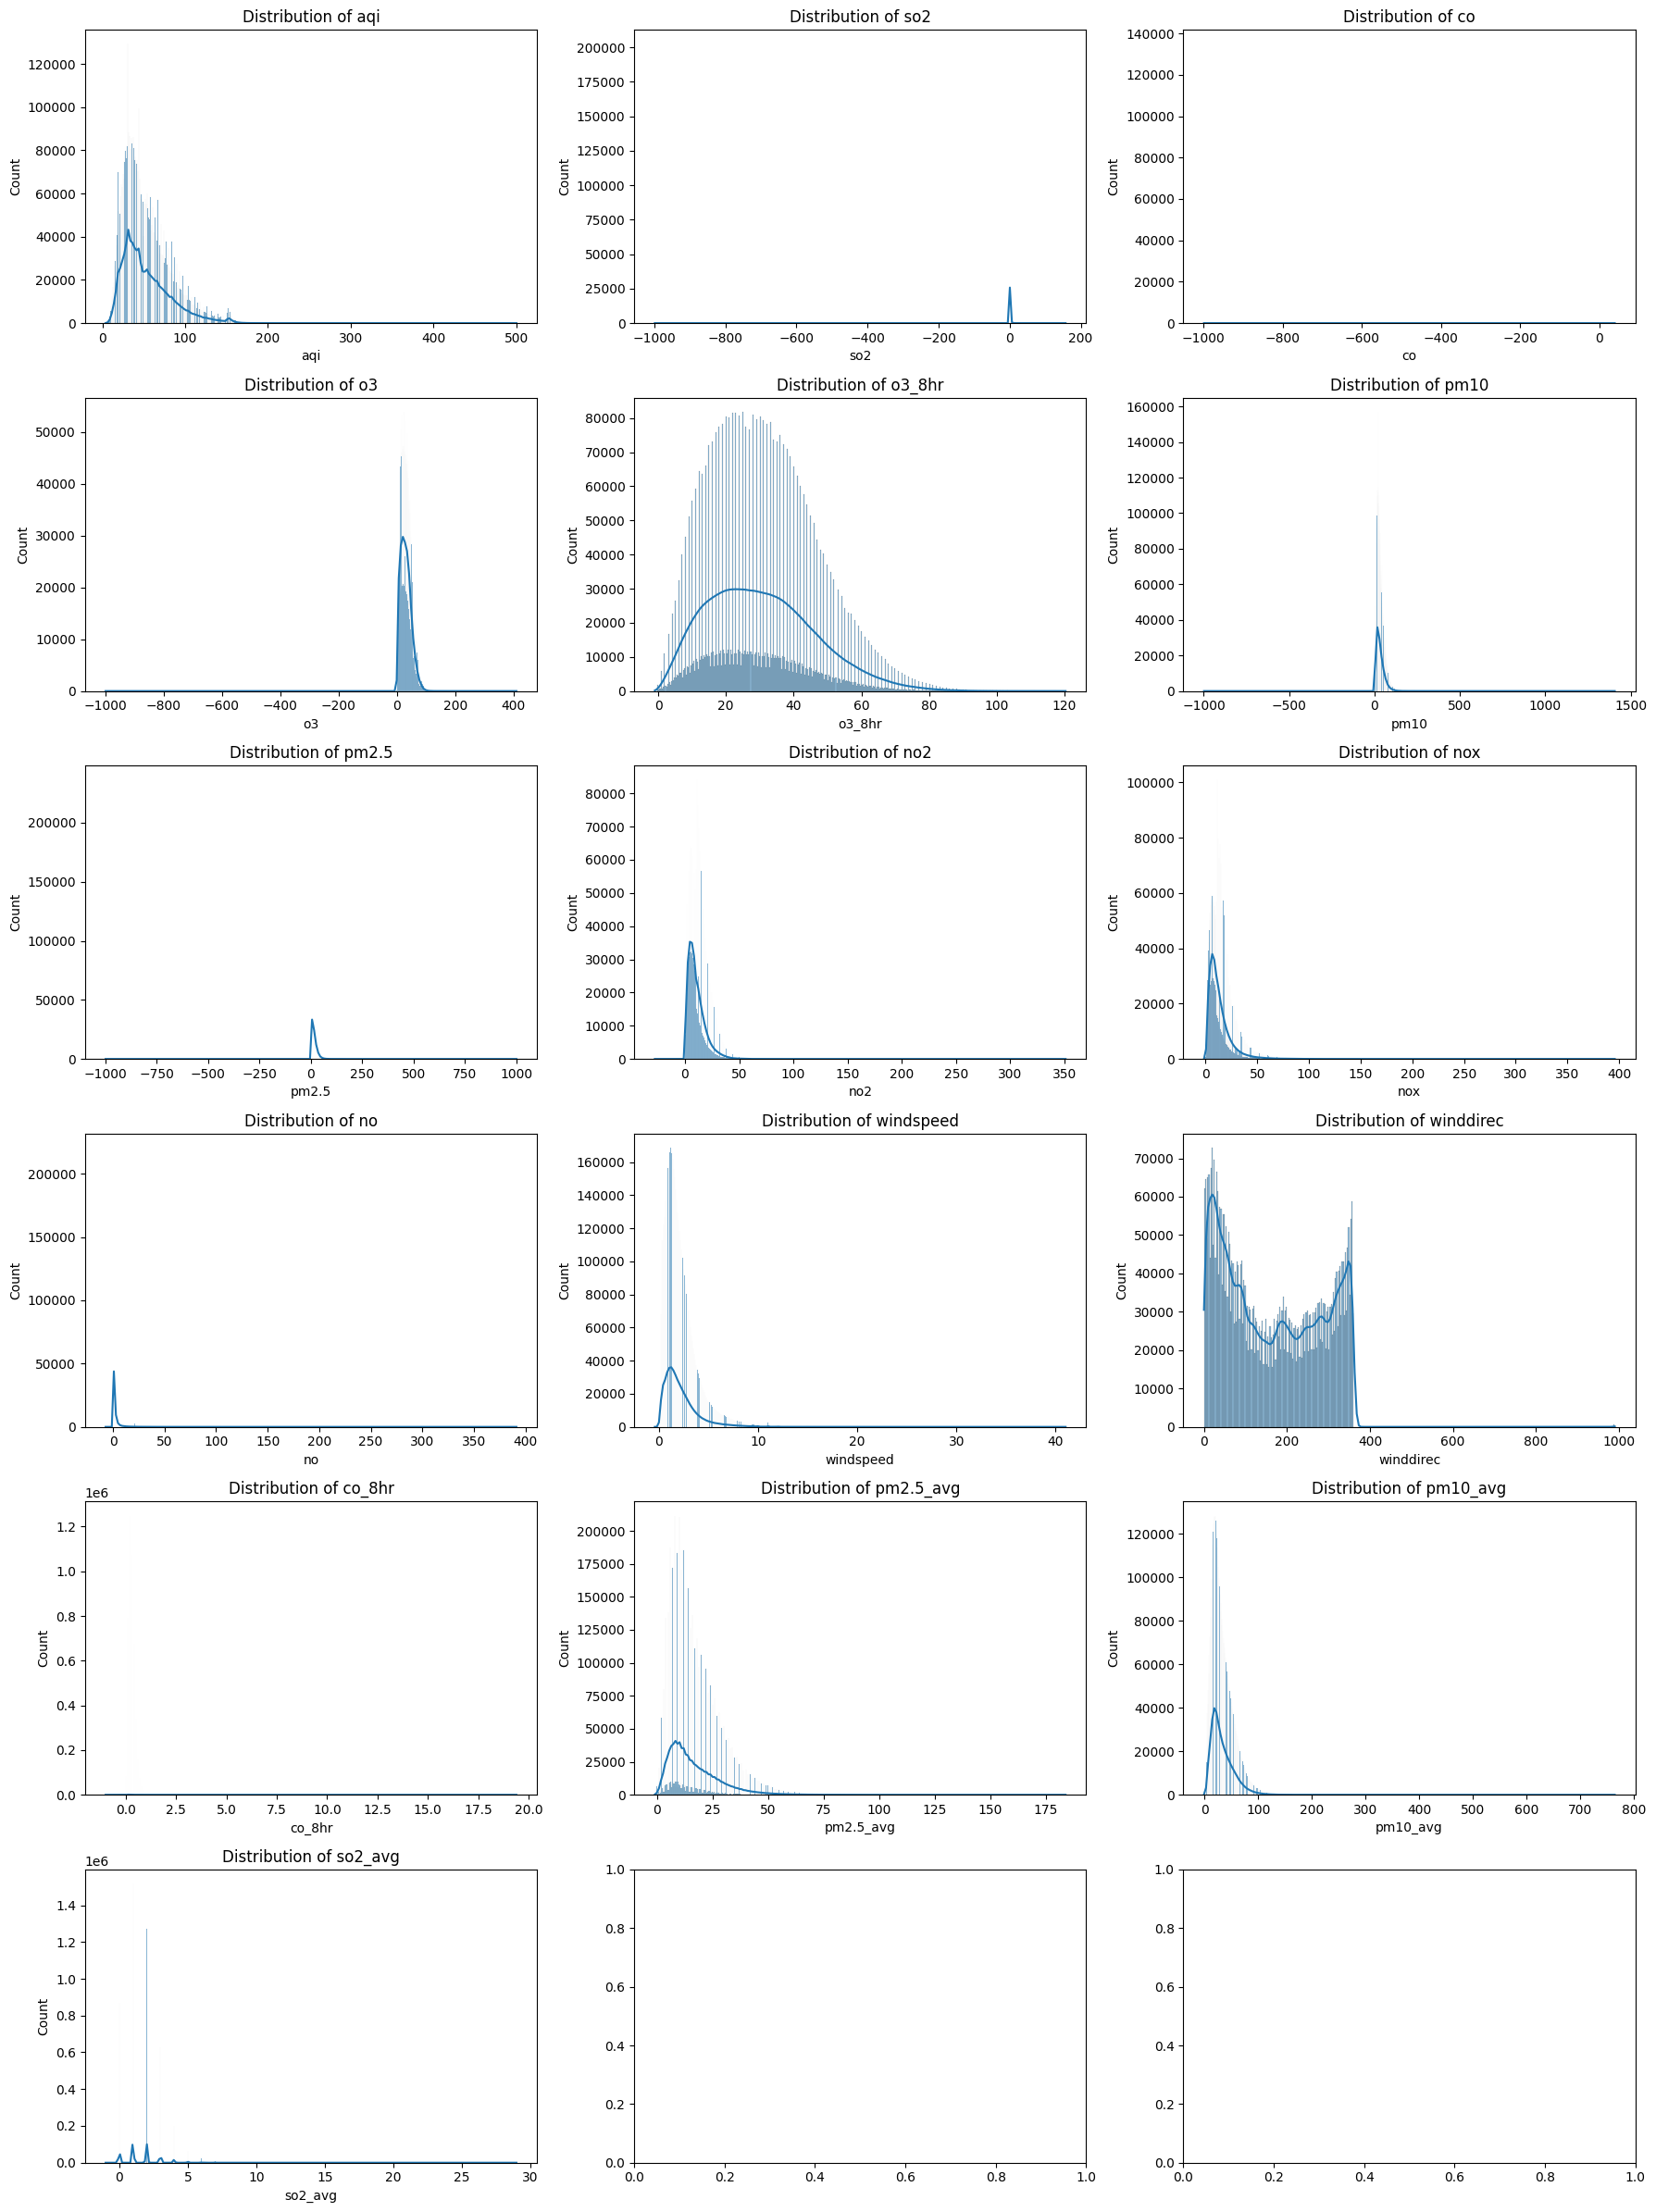

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

num_columns = preprocess_data.shape[1]
cols = 3
num_rows = math.ceil(num_columns / cols)
fig, axes = plt.subplots(num_rows, cols, figsize=(cols * 6, num_rows * 4))
axes = axes.flatten()

for i, column in enumerate(preprocess_data.columns):
    sns.histplot(preprocess_data[column], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {column}")

plt.tight_layout()
plt.show()